# Bike Sharing 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
bike_dict = '''
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered'''

In [7]:
print(bike_dict)


- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [8]:
bike = pd.read_csv('data/day.csv', index_col=0)
bike.index.name = 'No.'
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
No.,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
print(bike_dict)


- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [10]:
bike.shape

(730, 15)

In [11]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


<hr>

__NOTE:__ 

Since there are 2 vairables that sums up and make the total count, i.e. Casual users and registerd users.
Thus, i'll vizualise these two variables seperately.

Creating new datasets for casual, registered and total count of users

In [13]:
# Casual users
bike_cas = bike.drop(['registered', 'cnt'], axis=1) 

# Registered Users
bike_reg = bike.drop(['casual', 'cnt'], axis=1)

# Total users
bike_cnt = bike.drop(['casual', 'registered'], axis=1)

## Data Visualisation

 Visualizing data for casual, registered and total count of users seperately

#### 1. Casual Users

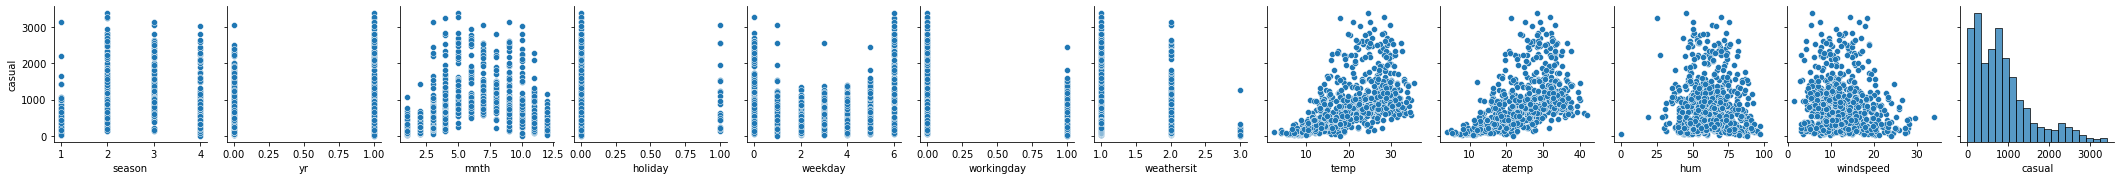

In [14]:
sns.pairplot(bike_cas, y_vars = 'casual')
plt.show()

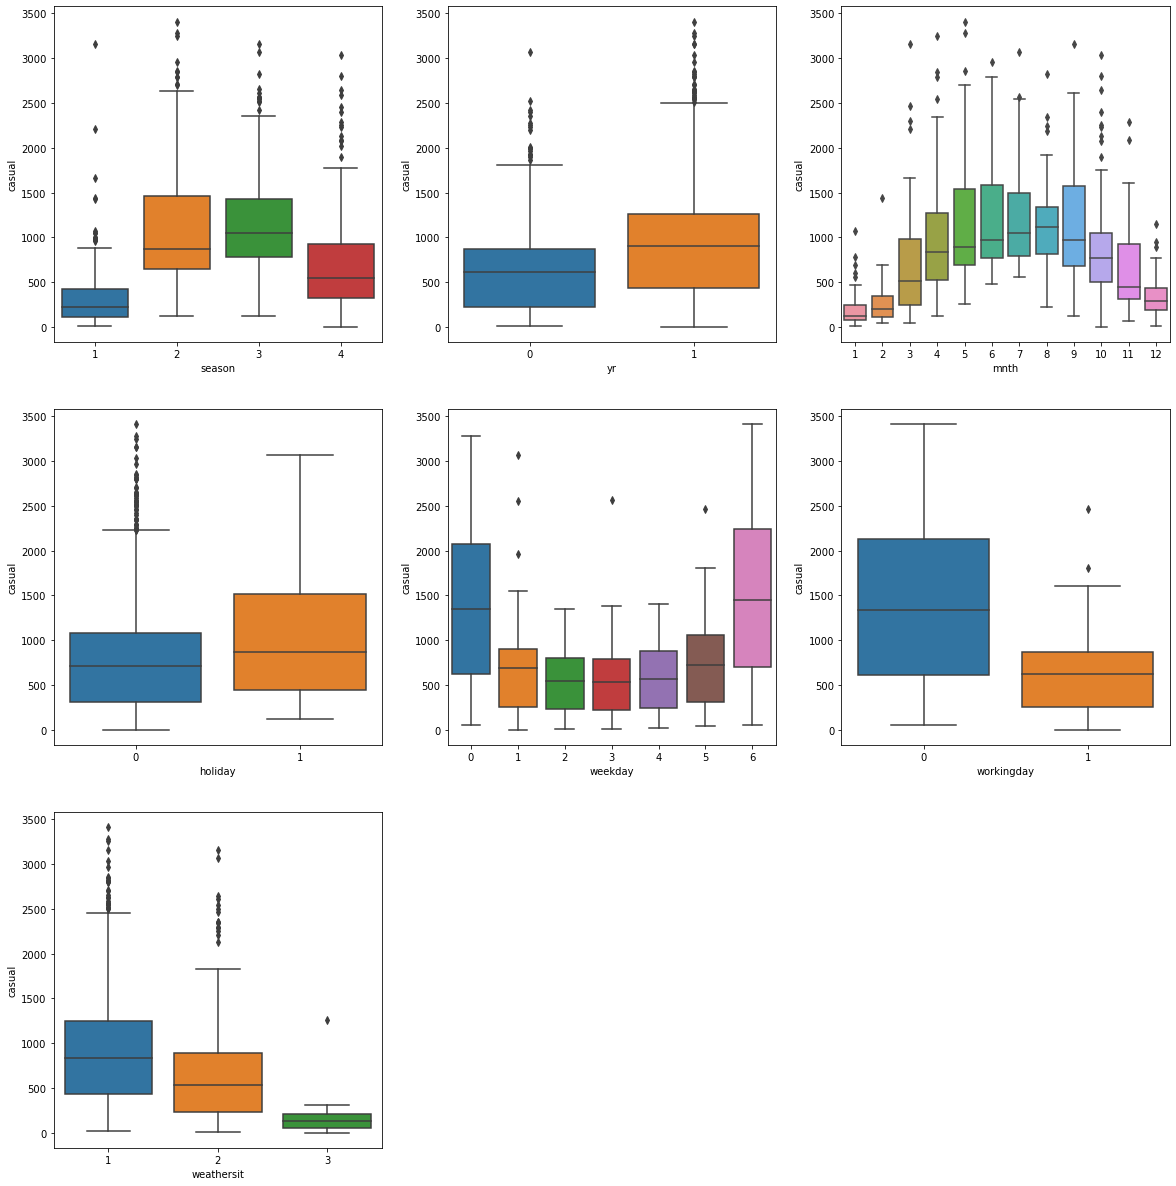

In [15]:
plt.figure(figsize=(20, 21))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'casual', data = bike_cas)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'casual', data = bike_cas)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'casual', data = bike_cas)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'casual', data = bike_cas)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'casual', data = bike_cas)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'casual', data = bike_cas)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'casual', data = bike_cas)
plt.show()

#### Observations for Casual users:
> * Summer season has the highest bookings or the month of June.
> * Year 2019 has the higher number of bookings
> * Higher booking on holiday.
> * Weekends has a higher number of bookings
> * People prefer too book bikes more on a clear day.
> * We can say that temp and atemp shows a linear relationship with the casual users of bikes on that day.
> * And humidity and windspeed is not showing any linear relationship


#### 2. Registered Users

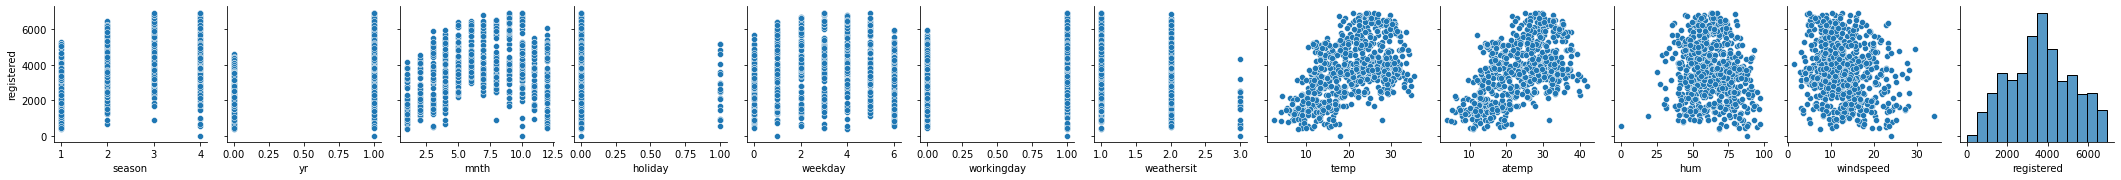

In [16]:
sns.pairplot(bike_reg, y_vars = 'registered')
plt.show()

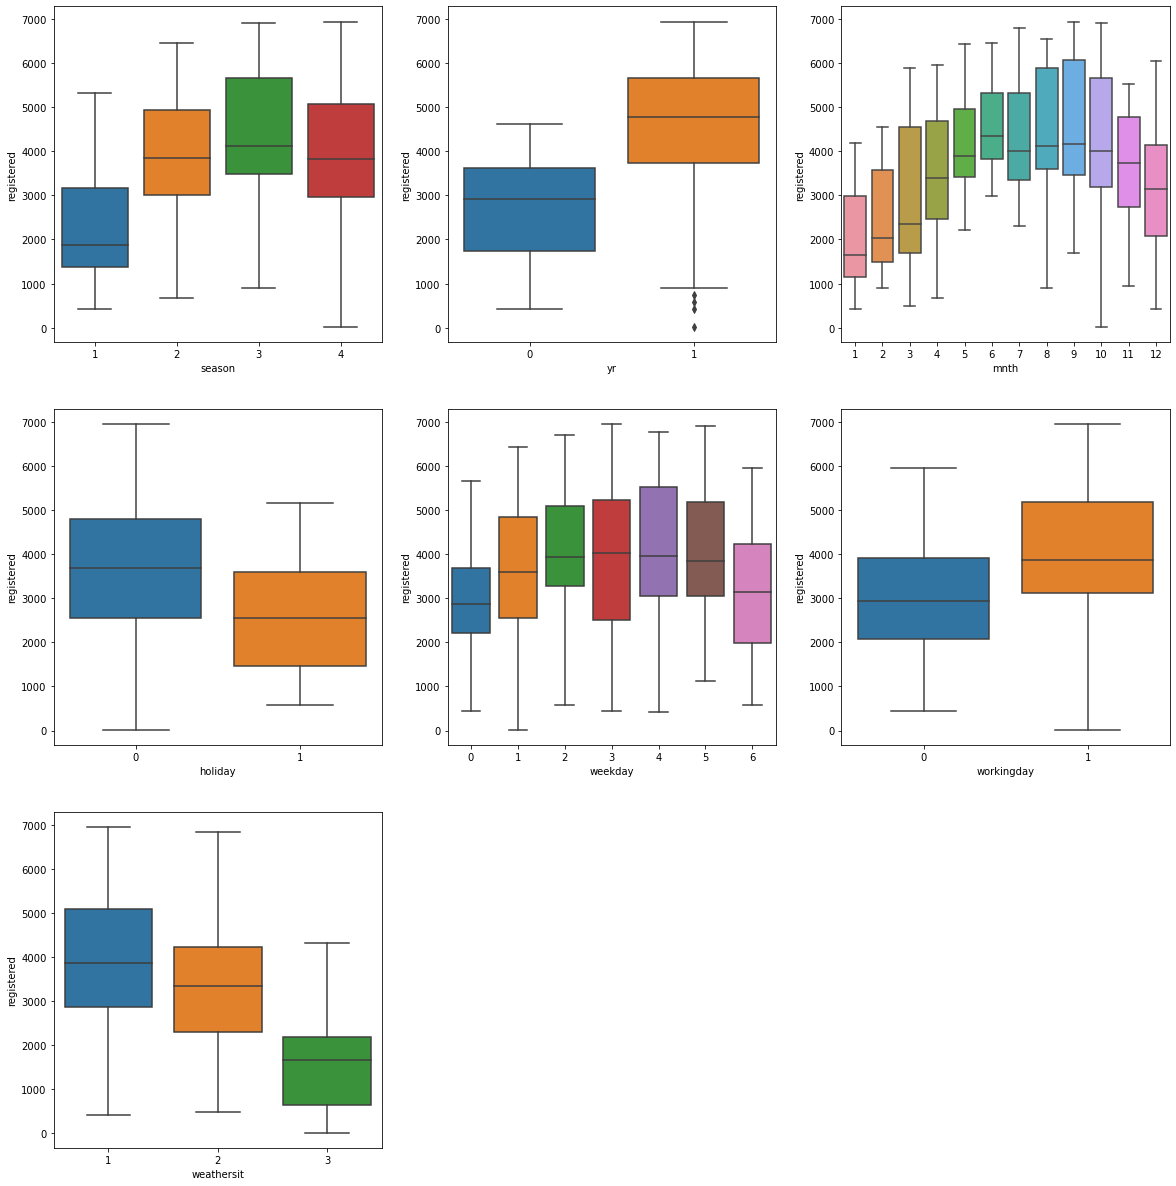

In [17]:
plt.figure(figsize=(20, 21))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'registered', data = bike_reg)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'registered', data = bike_reg)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'registered', data = bike_reg)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'registered', data = bike_reg)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'registered', data = bike_reg)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'registered', data = bike_reg)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'registered', data = bike_reg)
plt.show()

#### Observations for Casual users:
> * Fall season has the highest bookings or the month of September.
> * Year 2019 has a much higher number of bookings
> * Higher booking on a non-holiday.
> * Friday has a highest number of bookings
> * People prefer too book bikes more on a clear day.

#### 3. Total count

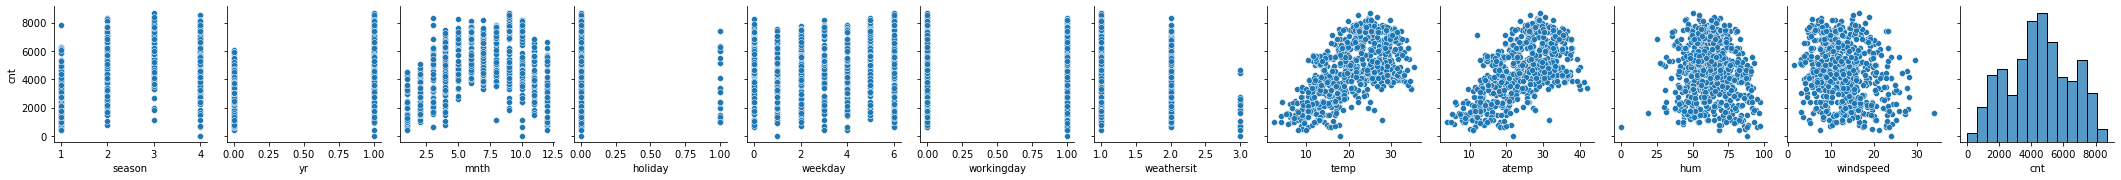

In [18]:
# Total Count
sns.pairplot(bike_cnt, y_vars = 'cnt')
plt.show()

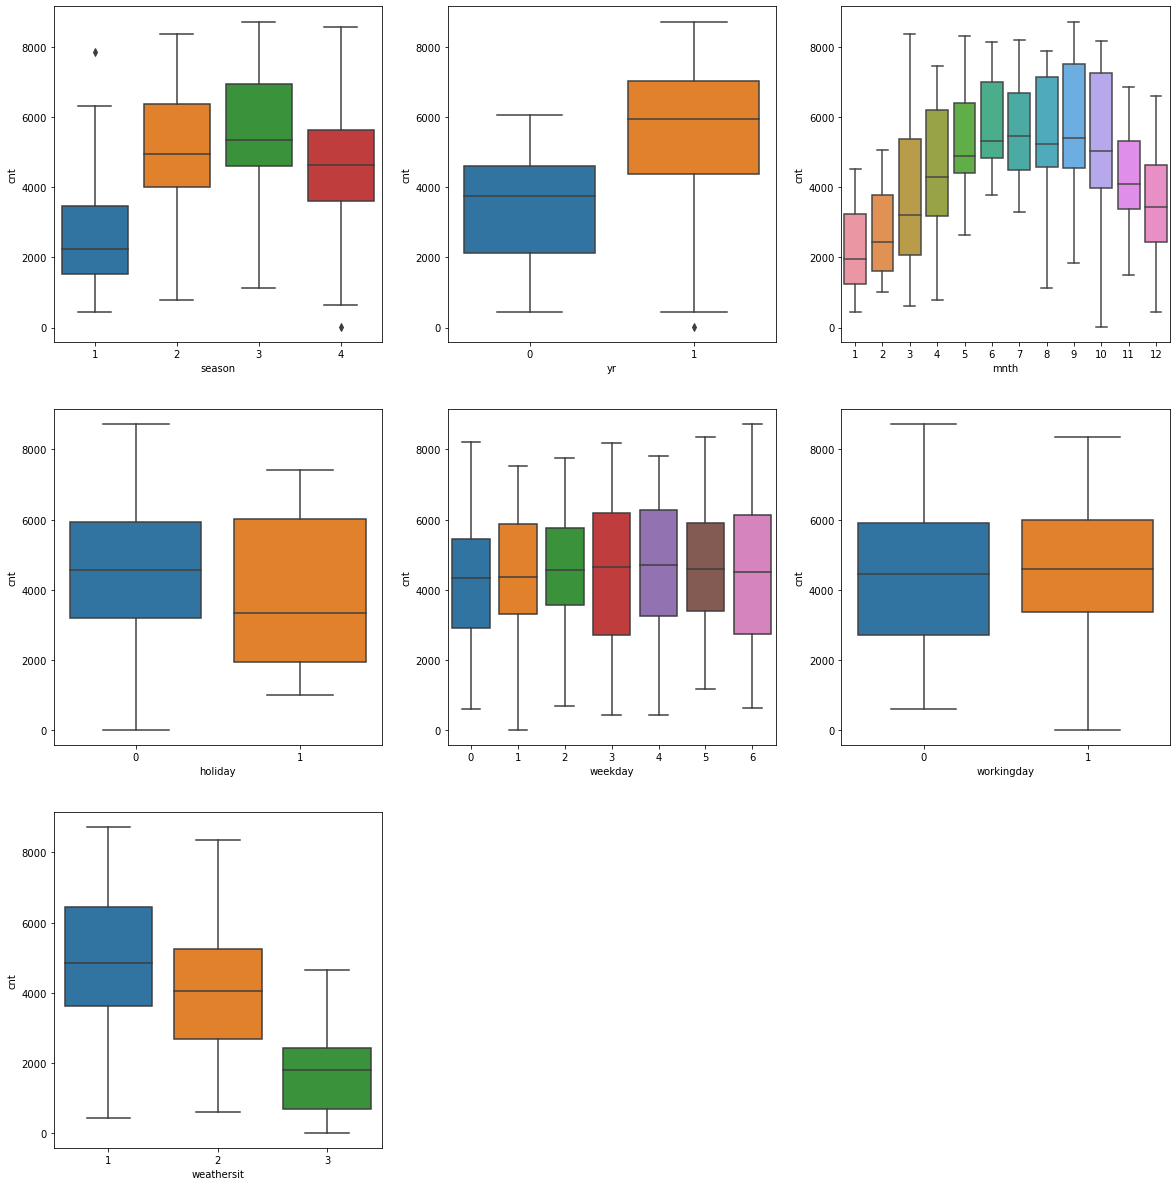

In [19]:
plt.figure(figsize=(20, 21))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_cnt)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_cnt)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_cnt)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_cnt)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_cnt)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_cnt)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_cnt)
plt.show()

#### Observations:
> * Fall season has the highest bookings or the month of sept.
> * Year 2019 has the higher number of bookings
> * Higher booking on non-holiday, for both casual and registered users.
> * Weekends has a higher number of bookings
> * People prefer too book bikes more on a sunny day.
> * We can say that temp and atemp shows a linear relationship with the cnt of bikes on that day.
> * And humidity and windspeed is not showing any linear relationship


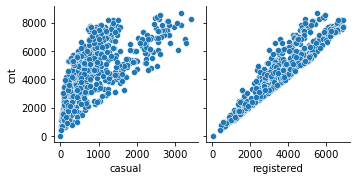

In [20]:
# Since cnt is a sum of casual and registered users, lets see what relaltionship these columns have.
sns.pairplot(bike, y_vars='cnt', x_vars=['casual', 'registered'])
plt.show()

We can see they have a pretty clear linear relationship

## Prepare data for modelling

Since the column atemp is mostly similar to temp in all aspects, thus dropping it from all datasets

In [21]:
# bike = bike.drop('atemp', axis=1)
bike_cnt = bike_cnt.drop('atemp', axis=1)

In [22]:
bike_cnt.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
No.,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
6,06-01-2018,1,0,1,0,4,1,1,8.378268,51.8261,6.000868,1606
7,07-01-2018,1,0,1,0,5,1,2,8.057402,49.8696,11.304642,1510
8,08-01-2018,1,0,1,0,6,0,2,6.765000,53.5833,17.875868,959
9,09-01-2018,1,0,1,0,0,0,1,5.671653,43.4167,24.250650,822


#### Creating dummies
Weathersit has 4 level of weather, lets create dummies for this column

In [23]:
print(bike_dict)


- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [24]:
bike_cnt['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [25]:
ws = pd.get_dummies(bike_cnt['weathersit'])
ws.tail(20)

,1,2,3
No.,,,
711,0,1,0
712,1,0,0
713,1,0,0
714,1,0,0
715,0,1,0
716,0,1,0
717,1,0,0
718,1,0,0
719,0,1,0


In [26]:
ws.columns = ['ws_clear', 'ws_mist', 'ws_light_rain']
ws

,ws_clear,ws_mist,ws_light_rain
No.,,,
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
726,0,1,0
727,0,1,0
728,0,1,0


In [27]:
bike_cnt = pd.concat([bike_cnt, ws], axis=1)
# bike_cnt.drop(['ws_clear', 'ws_mist', 'ws_light_rain'], axis=1, inplace=True)
bike_cnt

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,ws_clear,ws_mist,ws_light_rain
No.,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,0,1,0
2,02-01-2018,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,0,1,0
3,03-01-2018,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0
4,04-01-2018,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0
5,05-01-2018,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114,0,1,0
727,28-12-2019,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095,0,1,0
728,29-12-2019,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341,0,1,0


### Split data into Train and Test data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_cnt, train_size=0.7, random_state=100)

In [30]:
bike_test

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,ws_clear,ws_mist,ws_light_rain
No.,,,,,,,,,,,,,,,
185,04-07-2018,3,0,7,1,1,0,2,29.793347,63.7917,5.459106,6043,0,1,0
536,20-06-2019,2,1,6,0,3,1,1,32.082500,59.2083,7.625404,6211,1,0,0
300,27-10-2018,4,0,10,0,4,1,2,19.270000,81.2917,13.250121,2659,0,1,0
222,10-08-2018,3,0,8,0,3,1,1,31.433347,42.4167,13.417286,4780,1,0,0
153,02-06-2018,2,0,6,0,4,1,1,29.315000,30.5000,19.583229,4968,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,04-12-2019,4,1,12,0,2,1,1,19.509153,73.3750,11.666643,6606,1,0,0
128,08-05-2018,2,0,5,0,0,0,1,21.661653,63.1667,5.000712,4333,1,0,0
641,03-10-2019,4,1,10,0,3,1,2,26.957500,79.3750,4.458569,7572,0,1,0


#### Rescalling

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
bike_cnt.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,ws_clear,ws_mist,ws_light_rain
No.,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,0,1,0
2,02-01-2018,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,0,1,0
3,03-01-2018,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0
4,04-01-2018,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0
5,05-01-2018,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0


In [34]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
bike_cnt[num_vars] = scaler.fit_transform(bike_cnt[num_vars])

In [35]:
bike_cnt.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,ws_clear,ws_mist,ws_light_rain
No.,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,0.355170,0.828620,0.284606,0.110792,0,1,0
2,02-01-2018,1,0,1,0,0,0,2,0.379232,0.715771,0.466215,0.089623,0,1,0
3,03-01-2018,1,0,1,0,1,1,1,0.171000,0.449638,0.465740,0.152669,1,0,0
4,04-01-2018,1,0,1,0,2,1,1,0.175530,0.607131,0.284297,0.177174,1,0,0
5,05-01-2018,1,0,1,0,3,1,1,0.209120,0.449313,0.339143,0.181546,1,0,0


In [36]:
bike_cnt.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,ws_clear,ws_mist,ws_light_rain
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,0.543852,0.645400,0.346568,0.516108,0.634247,0.336986,0.028767
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,0.228140,0.146402,0.159873,0.222735,0.481971,0.473004,0.167266
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.346084,0.534704,0.232045,0.362143,0.000000,0.000000,0.000000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.548307,0.643959,0.326928,0.520766,1.000000,0.000000,0.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.743261,0.750535,0.434629,0.683847,1.000000,1.000000,0.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
bike_cnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dteday         730 non-null    object 
 1   season         730 non-null    int64  
 2   yr             730 non-null    int64  
 3   mnth           730 non-null    int64  
 4   holiday        730 non-null    int64  
 5   weekday        730 non-null    int64  
 6   workingday     730 non-null    int64  
 7   weathersit     730 non-null    int64  
 8   temp           730 non-null    float64
 9   hum            730 non-null    float64
 10  windspeed      730 non-null    float64
 11  cnt            730 non-null    float64
 12  ws_clear       730 non-null    uint8  
 13  ws_mist        730 non-null    uint8  
 14  ws_light_rain  730 non-null    uint8  
dtypes: float64(4), int64(7), object(1), uint8(3)
memory usage: 92.4+ KB


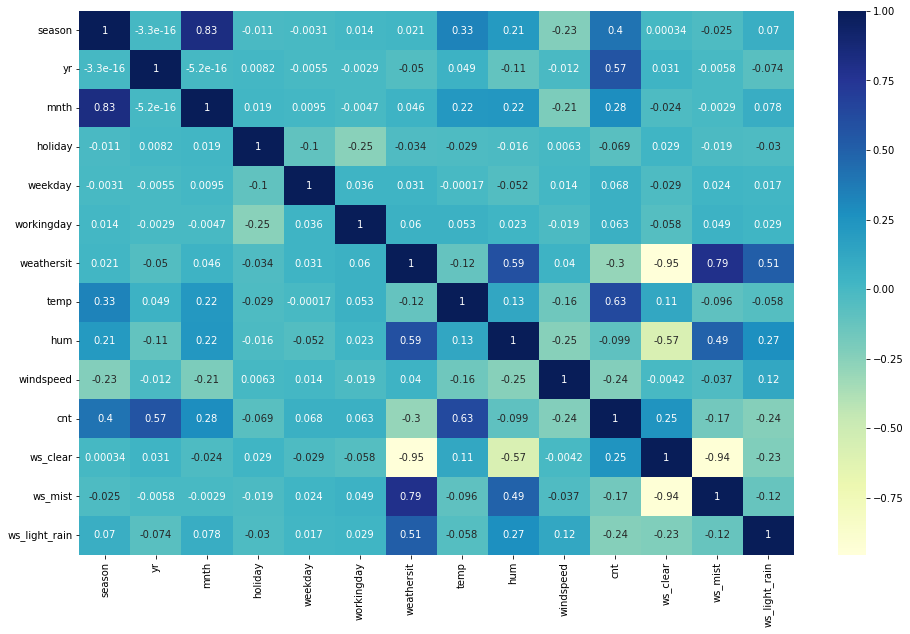

In [38]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_cnt.corr(), annot = True, cmap="YlGnBu")
plt.show()

As seen above, the cnt of bikes have a higher corelation with temp, lets visualize it

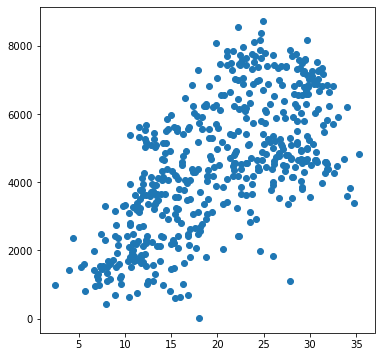

In [39]:
plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

Divide dataset into X and y

In [40]:
X_train = bike_train.pop('cnt')
y_train = bike_train

In [56]:
X_train = X_train.values.reshape(510,1)
X_train.shape

(510, 1)

In [42]:
y_train

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,ws_clear,ws_mist,ws_light_rain
No.,,,,,,,,,,,,,,
577,31-07-2019,3,1,7,0,2,1,1,29.246653,70.4167,11.083475,1,0,0
427,03-03-2019,1,1,3,0,6,0,2,16.980847,62.1250,10.792293,0,1,0
729,30-12-2019,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1,0,0
483,28-04-2019,2,1,4,0,6,0,2,15.443347,48.9583,8.708325,0,1,0
112,22-04-2018,2,0,4,0,5,1,2,13.803347,72.9583,14.707907,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,02-08-2019,3,1,8,0,4,1,1,30.852500,65.9583,8.666718,1,0,0
54,23-02-2018,1,0,2,0,3,1,1,9.091299,42.3043,6.305571,1,0,0
351,17-12-2018,4,0,12,0,6,0,2,10.591653,56.0833,16.292189,0,1,0


In [58]:
y_train.drop(['dteday'], axis=1, inplace=True)

## RFE

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,step=10)
rfe = rfe.fit(X_train, y_train)

ValueError: Found array with 1 feature(s) (shape=(510, 1)) while a minimum of 2 is required by RFE.

<hr>

#### UNFORTUNATELY, I WAS UNABLE TO COMPLETE THE ASSIGNMENT.
__I HAD OTHER COMMEITMENTS WITH MY WORK,AND THUS DIDN'T GET ENOUGH TIME TO COMPLETE A GOOD ASSIGNMENT. 
HAD A RECENT JOB CHANGE, THUS HAVING UNEVEN WORK LOAD ON DIFFERENT DAYS__. 

__DIDN'T KNOW WHAT TO DO AFTER APPLYING FIRST EXTENSION ALSO, I WAS UNABLE TO COMPLETE IT, AS I WAS ENCOUNTERING DIFFERENT ERRORS.THUS, SUBMITTING HOW MUCH I DID.__

__HOPE YOU UNDERSTAND.
THANKS__
